# Best Schools in Pittsburgh
## By: Morgan Engel
#### Dataset: [Schools in Pittsburgh Cities](https://data.wprdc.org/dataset/pittsburgh-public-schools-individualized-education-plan-iep/resource/62403582-e6c3-40b6-9bb6-d5d38e3f058d)
Our project is to determine which Pittsburgh neighborhood would be best for children.

I chose to see which neighborhoods had the best schools by looking into the percentage of gifted students that are enrolled in each school district, which would demonstrate the success that most students would have.

First, I imported everything needed and then read in the dataset

In [3]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
schools = pd.read_csv("neighborhood_iep.csv")
schools.head()

,neighborhoods,gifted,other_iep,not_iep_or_gifted,total_enrollment_k_12
0,"Allegheny Center, Allegheny West, California K...",12,89,250,351
1,"Allentown, Beltzhoover",15,148,366,529
2,"Banksville, Ridgemont, Oakwood, East Carnegie,...",24,70,436,530
3,Beechview,44,166,540,750
4,"Bloomfield, Friendship",43,50,198,291


Then, I used the school dataset to determine the percentage of enrolled kids that were in the gifted program

In [4]:
schools['percentage_of_gifted'] = round((schools['gifted'] / schools['total_enrollment_k_12']) * 100, 2)
df = pd.DataFrame(schools).sort_values(by=['percentage_of_gifted'], ascending=False).set_index('neighborhoods')
df.head()

,gifted,other_iep,not_iep_or_gifted,total_enrollment_k_12,percentage_of_gifted
neighborhoods,,,,,
Squirrel Hill North,108,20,200,328,32.93
"Squirrel Hill South, Regent Square, Swisshelm Park",242,69,440,751,32.22
Point Breeze,97,32,177,306,31.70
Highland Park,83,45,254,382,21.73
Greenfield,85,59,327,471,18.05


My dataset came with a lot of neighborhoods combined in rows, so I had to split all the neighborhoods into their own rows. I did this by creating two lists with the neighborhoods and their corresponding gifted percentages and then converted them into their own dataset. This also filtered out all of the data that I didn't need anymore

In [5]:
neighborhood_list = []
gifted_list = []

for index, row in schools.iterrows():
    neighborhoods = row['neighborhoods']
    gifted = row['percentage_of_gifted']
    split = neighborhoods.split(", ")
    length = len(split)
    i = 0
    while i < len(split):
        neighborhood_list.append(split[i])
        gifted_list.append(gifted)
        i += 1
dictionary = {'Neighborhoods':neighborhood_list, 'Percentage_of_Gifted':gifted_list}
df2 = pd.DataFrame(dictionary, columns=['Neighborhoods', 'Percentage_of_Gifted']).sort_values(by=['Percentage_of_Gifted'], 
                    ascending=False).set_index('Neighborhoods')

df2

,Percentage_of_Gifted
Neighborhoods,
Squirrel Hill North,32.93
Swisshelm Park,32.22
Regent Square,32.22
Squirrel Hill South,32.22
Point Breeze,31.70
...,...
Sheraden,2.20
Hill District,2.20
Spring Hill,1.68


Next, I created a bar graph visual of the top 10 schools

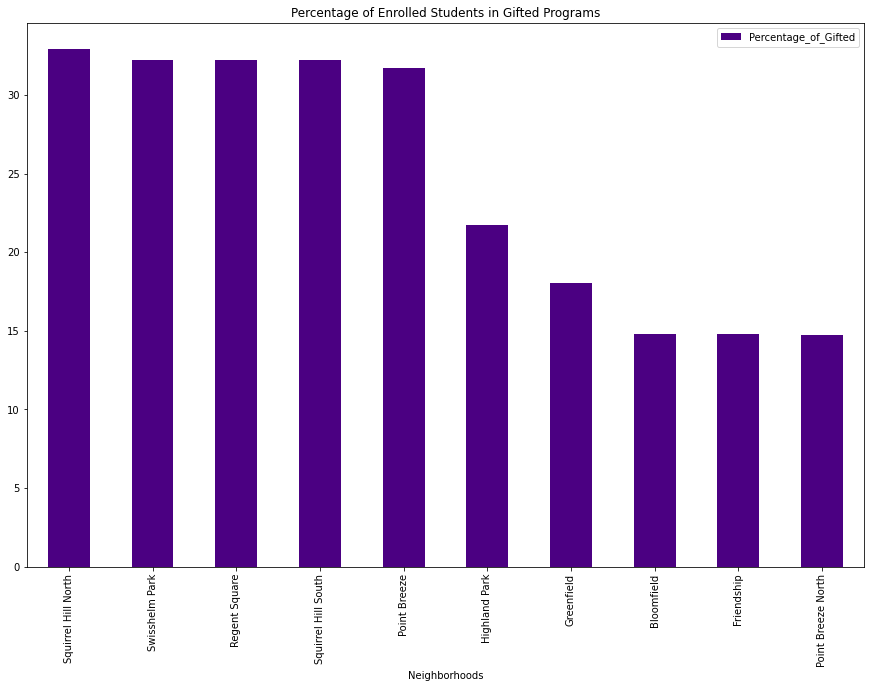

In [6]:
df2.head(10).plot.bar(title="Percentage of Enrolled Students in Gifted Programs", column='Percentage_of_Gifted', 
                      figsize=(15, 10), color='indigo')

I also created a color coded map to show the realtion that location has to the programs that the school offers

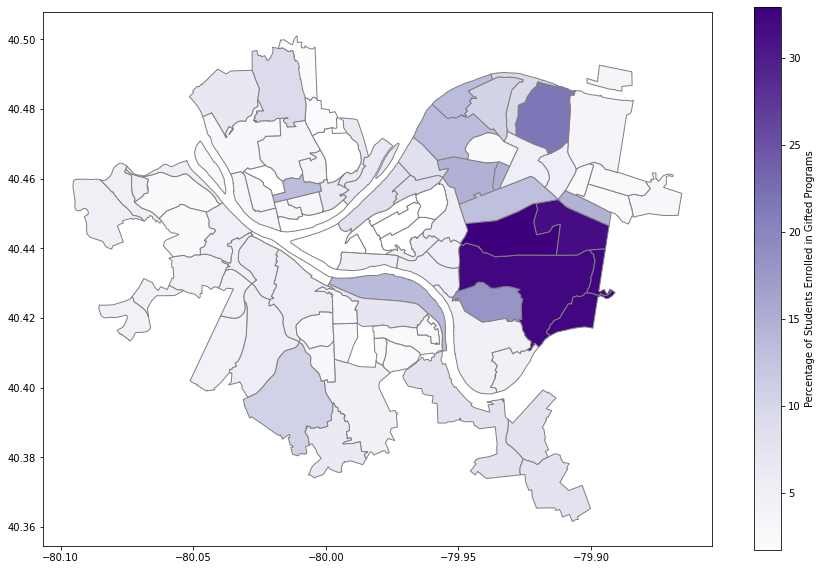

In [7]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods_map = neighborhoods.merge(df2, how='left', left_on='hood', right_on='Neighborhoods')
neighborhoods_map[['hood','Percentage_of_Gifted','geometry']].head()
neighborhoods_map.plot(column='Percentage_of_Gifted', cmap='Purples', edgecolor="gray", legend=True, 
                       legend_kwds={'label': "Percentage of Students Enrolled in Gifted Programs"}, 
                       figsize=(15, 10), missing_kwds={"color": "white"})

After finding the percentages, our group decided to put our data on a scale, where the best school is rated one

In [33]:
maxValue = df2.iloc[0,0]
for index, row in df2.iterrows():
    score = row["Percentage_of_Gifted"]/maxValue
    df2.at[index, "Overall_Score"] = round(score, 2)
df2

,Percentage_of_Gifted,Overall Score,Overall_Score
Neighborhoods,,,
Squirrel Hill North,32.93,1.00,1.00
Swisshelm Park,32.22,0.98,0.98
Regent Square,32.22,0.98,0.98
Squirrel Hill South,32.22,0.98,0.98
Point Breeze,31.70,0.96,0.96
...,...,...,...
Sheraden,2.20,0.07,0.07
Hill District,2.20,0.07,0.07
Spring Hill,1.68,0.05,0.05


Seeing the ratings of the gifted students enrolled in each neighborhood, we can see that Squirrel Hill North has the best schools out of all the Pittsburgh neighborhoods, and is the best neighborhood to raise children in, according to the data from the schools. Following close behind is: Swisshelm Park, Regent Square, and Squirrel Hill South.

Looking at the other data, we can see that Northview Heights, Summer Hill, and Spring Hill all have the lowest amount of students enrolled into their gifted programs in their school districts

In [39]:
for index, row in df2.iterrows():
    print(index + ": " + str(row['Overall_Score']))

Squirrel Hill North: 1.0
Swisshelm Park: 0.98
Regent Square: 0.98
Squirrel Hill South: 0.98
Point Breeze: 0.96
Highland Park: 0.66
Greenfield: 0.55
Bloomfield: 0.45
Friendship: 0.45
Point Breeze North: 0.45
South Side Flats: 0.42
Upper Lawrenceville: 0.41
Central Lawrenceville: 0.41
Central Northside: 0.41
Shadyside: 0.39
Brookline: 0.32
Stanton Heights: 0.32
Morningside: 0.29
Perry North: 0.28
Lower Lawrenceville: 0.25
Strip District: 0.25
Polish Hill: 0.25
New Homestead: 0.24
Hays: 0.24
Lincoln Place: 0.24
South Side Slopes: 0.22
Brighton Heights: 0.21
East Allegheny: 0.2
Spring Garden: 0.2
Troy Hill: 0.2
Overbrook: 0.2
Beechview: 0.18
Duquesne Heights: 0.17
Mount Washington: 0.17
West Oakland: 0.17
South Oakland: 0.17
North Oakland: 0.17
Central Oakland: 0.17
Bluff: 0.17
West End: 0.16
Elliott: 0.16
Larimer: 0.16
East Liberty: 0.16
Esplen: 0.15
Chartiers City: 0.15
Windgap: 0.15
Fairywood: 0.15
Carrick: 0.15
Glen Hazel: 0.14
Hazelwood: 0.14
East Carnegie: 0.14
Oakwood: 0.14
Westwood